# Should Make School Bring Back VR?

#### NPS Project by Zain Raza

In [548]:
# init imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [549]:
df = pd.read_csv('SA Feedback Surveys_FINAL/2017/Student-Feedback-Surveys-Superview.csv')
df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


## Q1: In this survey, how many of the responses came from VR students? 

In [550]:
vr_students = df[df['Track'] == 'VR']
num_vr = len(vr_students)
num_vr

60

#### But wait! This does not mean there were 60 different VR students in the program!

## Q2: Assuming that students were not allowed to change concentration, and that students were not allowed to enter Make School mid-program, what is the number of distinct students in VR?

#### Let's create a distribution of students by week and by track.

#### That way, we can get an idea of how many individual students there were in each track!

In [547]:
table = pd.crosstab(df['Track'], df['Week'])
table

Week,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
Track,,,,,,,,
Apps,183,176,142,105,101,88,72,4
"Apps, Explorer",42,40,38,34,31,23,16,0
Games,35,29,36,33,31,21,19,4
"Games, Explorer",6,6,7,7,6,6,5,0
VR,10,10,10,10,7,5,7,1


#### Let's assume the max in row represents the number of students in that track

##### So now what kinds of information can we see?

In [551]:
# find the numbers of students
students_apps = dict(pd.crosstab(df['Week'], df['Track']))['Apps'].values.max()  # students in Apps track
students_apps_explorer = dict(pd.crosstab(df['Week'], df['Track']))['Apps, Explorer'].values.max()  # students in Apps/Explorer track
students_games = dict(pd.crosstab(df['Week'], df['Track']))['Games'].values.max()  # students in Games track
students_games_explorer = dict(pd.crosstab(df['Week'], df['Track']))['Games, Explorer'].values.max()  # students in Games/Explorer track
students_vr = dict(pd.crosstab(df['Week'], df['Track']))['VR'].values.max()  # students in VR track

# store them in a list
num_students = [
    students_apps,
    students_apps_explorer,
    students_games,
    students_games_explorer,
    students_vr
]

track_names = ['Apps', 'Apps, Explorer','Games','Games, Explorer','VR']

### Let's Calculate the numbers (and percentages) of students in each track, out of all the students in the program!

In [589]:
total = sum(num_students)
percentages = [num/total for num in num_students]

students_for_each_track = pd.DataFrame(data={
        '# Students': num_students,
        '% of All Students': percentages
    }, index=track_names)

### We can now see (an estimate of) the number of students in each track!

In [590]:
students_for_each_track

,# Students,% of All Students
Apps,183,0.658273
"Apps, Explorer",42,0.151079
Games,36,0.129496
"Games, Explorer",7,0.025180
VR,10,0.035971


### Sizes of Make School 2017 Tracks

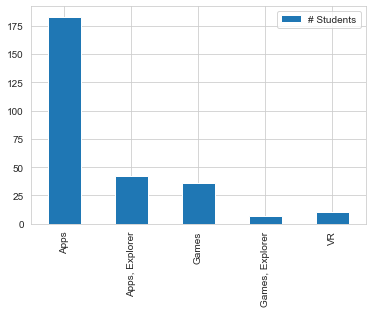

In [594]:
students_for_each_track.plot.bar(y='# Students')

## Q3: What percentage of students did each track take up out of all students?

### Let's create a pie chart! So we can compare the relative sizes of tracks as percentages, not just numbers.

### Percentage of Make School Student Body in Each Track

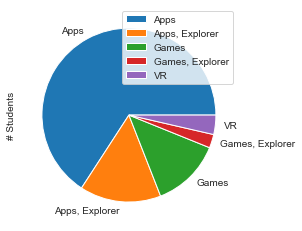

In [560]:
students_for_each_track.plot.pie(y='# Students')

## Q4: As a group, what was the NPS score of students in the VR track?

In [522]:
not_vr = 'Non-VR'
def calculate_nps(track, week):
    '''Return the NPS score of students within a given track at Make School, for a given week during the program.'''
    if not track == not_vr:
        students = df[(df['Track'] == track) & (df['Week'] == week)]
    else:  # if we're taking the NPS for all non VR students (not a track in dataset)
        students = df[(df['Track'] != 'VR') & (df['Week'] == week)]

    # classify people as either promoters, passives, or detractors
    promoters, passives, detractors = 0, 0, 0
    ratings = students['Rating (Num)']
    for rating in ratings:
        # dealing with NaN ratings
        try:
            rating = int(rating)
        except ValueError:
            break
        # using rating to create counts of promoters, passives, and detractors
        if rating >= 9:
            promoters +=1
        elif rating >= 7:
            passives += 1
        else:
            detractors += 1
    # calculate the NPS score!
    try:
        nps = (promoters - detractors)/(promoters + passives + detractors)
    except ZeroDivisionError:  # some weeks no one from the track answered the nps survey
        nps = 0
    return nps

### How does the function above work? Let's test it out, using VR students during Week 1 as our data sample!

In [595]:
calculate_nps('Non-VR', 'Week 3')

0.4520547945205479

### How did the NPS score of VR students change over the course of Make School?
### How does their trend compare with students from other tracks?

In [596]:
# it'll be useful to keep a list of all the weeks here:
weeks = [
    'Week 1',
    'Week 2',
    'Week 3',
    'Week 4',
    'Week 5',
    'Week 6',
    'Week 7',
    'Week 8',
]

# let's keep track of the groups we're comparing too
groups = track_names + [not_vr]
groups

['Apps', 'Apps, Explorer', 'Games', 'Games, Explorer', 'VR', 'Non-VR']

In [597]:
def calculate_nps_all_tracks_one_week(tracks, week):
    '''For one week, return the NPS score for all the tracks.'''
    scores = list()
    for track in tracks:
        scores.append(calculate_nps(track, week))
    return scores

### Great, now let's tabulate the data, and see the NPS scores across all tracks week by week!

In [598]:
nps_by_track_per_week = pd.DataFrame(data={
        weeks[0]: calculate_nps_all_tracks_one_week(groups, weeks[0]), # list of NPS scores for week 1 only
        weeks[1]: calculate_nps_all_tracks_one_week(groups, weeks[1]), # done across all tracks
        weeks[2]: calculate_nps_all_tracks_one_week(groups, weeks[2]), # track order is as follows:
        weeks[3]: calculate_nps_all_tracks_one_week(groups, weeks[3]), # Apps, Apps, Explorer,Games,Games, Explorer,VR
        weeks[4]: calculate_nps_all_tracks_one_week(groups, weeks[4]),
        weeks[5]: calculate_nps_all_tracks_one_week(groups, weeks[5]),
        weeks[6]: calculate_nps_all_tracks_one_week(groups, weeks[6]),
        weeks[7]: calculate_nps_all_tracks_one_week(groups, weeks[7])
    }, index=groups
)

nps_by_track_per_week

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
Apps,0.366120,0.369318,0.464789,0.371429,0.405941,0.420455,0.569444,1.00
"Apps, Explorer",0.166667,0.325000,0.315789,0.294118,0.322581,0.347826,0.437500,0.00
Games,0.314286,0.724138,0.583333,0.666667,0.612903,0.666667,0.736842,0.50
"Games, Explorer",0.666667,0.833333,0.857143,0.714286,0.666667,0.666667,0.600000,0.00
VR,0.700000,0.800000,0.800000,0.300000,1.000000,1.000000,0.714286,1.00
Non-VR,0.338129,0.395437,0.452055,0.426230,0.436047,0.460432,0.575221,0.75


### Can we compare change in NPS score for VR students vs. other tracks using a line plot?

#### Shoutout to Tanner for his help in making the legend!

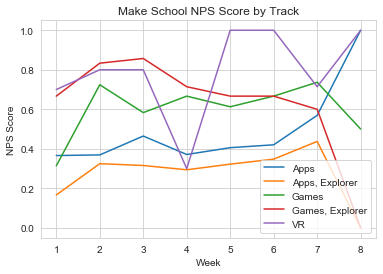

In [599]:
fig, ax = plt.subplots()

def make_plots_for_tracks(track, weeks):
    scores = nps_by_track_per_week.head(groups.index(track) + 1)
    nps_scores = []
    for i in range(1, 9):
        nps_scores.append(scores[f'Week {i}'])
    # print(nps_scores)
    ax.plot(range(1,9), nps_scores)
    plt.legend(groups, loc=4)
    
make_plots_for_tracks('VR', weeks)
ax.set(xlabel='Week', ylabel='NPS Score',
       title='Make School NPS Score by Track')
plt.show()

### Ok, but how does VR stack up against vs. all the rest of Make School in 2017?

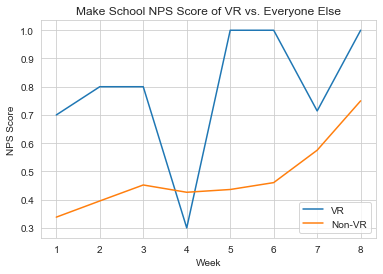

In [600]:
fig, ax = plt.subplots()
def make_plots_for_vr_and_rest(weeks):
    scores = nps_by_track_per_week.tail(2)
    nps_scores = []
    for i in range(1, 9):
        nps_scores.append(scores[f'Week {i}'])
    ax.plot(range(1,9), nps_scores)
    plt.legend(['VR', 'Non-VR'], loc=4)
    
make_plots_for_vr_and_rest(weeks)
ax.set(xlabel='Week', ylabel='NPS Score',
       title='Make School NPS Score of VR vs. Everyone Else')
plt.show()

## Q5: What was the amount of variance in how many VR students responded to the NPS survey over the 8 weeks?
### How does this compare to students from the other tracks?

### Let's go back to our table of the responses from each track week by week:

In [602]:
flipped_table = pd.crosstab(df['Week'],df['Track'])
melted_table = pd.melt(flipped_table)
renamed_table = melted_table.rename(columns = {'value':'Number Responses'})
renamed_table

,Track,Number Responses
0,Apps,183
1,Apps,176
2,Apps,142
3,Apps,105
4,Apps,101
5,Apps,88
6,Apps,72
7,Apps,4
8,"Apps, Explorer",42
9,"Apps, Explorer",40


### Representation as Violin Plot

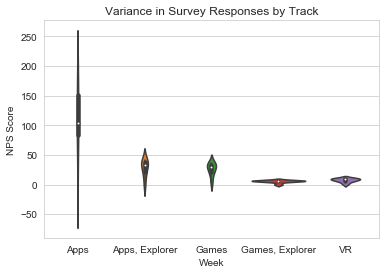

In [603]:
fig, ax = plt.subplots()
sns.violinplot(y='Number Responses', x='Track', data=renamed_table)
ax.set(xlabel='Week', ylabel='NPS Score',
       title='Variance in Survey Responses by Track')
plt.show()

### Alt Representation Using Line Plot - Shoutout to John for helping me with this!

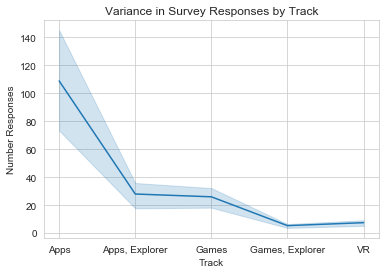

In [604]:
fig, ax = plt.subplots()
ax.set(title='Variance in Survey Responses by Track')
sns.lineplot(y='Number Responses', x='Track', data=renamed_table)
plt.show()

## Q6: Do the students who feel positive about Make School do better in class than those who don't?

In [444]:
pacing_replies = df['Schedule Pacing'].unique()
pacing_replies

array(['Just right', 'A little too fast', 'Way too slow',
       'A little too slow', 'Way too fast', nan], dtype=object)

In [445]:
def is_doing_okay(reply):
    '''Return True if the student is not falling behind their Make School classes.'''
    return (reply == 'Just right' or reply == 'A little too slow' or reply == 'Way too slow')

### Making a new DataFrame of promoters, passives, and detractors at each week in the program, and the percent of people in that group that did well in classes that week.

In [605]:
def classify_person_by_rating(rating):
    '''Return whether a person is a promoter, is passive, or is a detractor based on their NPS score.'''
    if not rating == '#ERROR!':
        rating = int(rating)
        if rating >= 9:
             return "Promoter"
        elif rating >= 7:
            return "Passive"
        else:
            return "Detractor"

In [606]:
# keep track of the groups we're tracking:
groups = ["Promoter", "Passive", "Detractor"]

## Deriving probability formula using Bayes' Theorem

#### Remember Bayes' Theorem?
$ P(A|B) = \frac{P(A and B)}{P(A)} $

#### In our scenario:

$ P(A|B) $ = P(Doing Well in Make School, Given Your NPS Group)

$ P(A) $ = P(Your NPS Group) 

In [608]:
def make_percentage_by_week_for_group(group):
    """Calculate the probability a person from this group did well in class, given they were in their group.
       Parameter: group(str)
       
       Returns: list
    
    """
    percentages = list()
    num_in_group, num_in_group_doing_ok = 0, 0
    # go week by week
    for week in weeks:
        for i in range(1, len(df['Rating (Num)'])):
            # determine if the person is in the group
            rating = df['Rating (Num)'][i]
            if group == classify_person_by_rating(rating):
                # determine if the person is doing well or not
                reply = df['Schedule Pacing'][i]
                if is_doing_okay(reply) is True and df['Week'][i] == week:
                # increment values as appropiate
                    num_in_group_doing_ok += 1
                num_in_group += 1
                # add a metric to the list
        if num_in_group == 0:
            percentages.append(0)
        else:
            percentages.append(num_in_group_doing_ok/num_in_group)
            
    return percentages

### Let's create lists of the conditional probabilities a promoter, a passive, and a detractor doing well in their Make School classes, week by week.

In [509]:
percents_for_all_groups = dict()
for group in groups:
    percents_of_one_group = make_percentage_by_week_for_group(group)
    percents_for_all_groups[group] = percents_of_one_group 
    

### Let's Takes a Look at That Data!

In [510]:
percents = pd.DataFrame(data=percents_for_all_groups, index=range(1,9))
percents

,Promoter,Passive,Detractor
1,0.134211,0.170475,0.158333
2,0.136842,0.146749,0.133333
3,0.140351,0.134739,0.130556
4,0.134211,0.127417,0.122917
5,0.128158,0.121968,0.120000
6,0.121711,0.115700,0.106944
7,0.117669,0.105197,0.101190
8,0.103947,0.092267,0.088542


### Do You Need to Love Make School to Do Well?

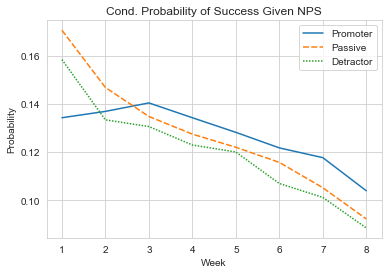

In [544]:
fig, ax = plt.subplots()
ax.set(xlabel='Week', ylabel='Probability',
       title='Cond. Probability of Success Given NPS')
sns.lineplot(data=percents)
plt.show()

# Summary of Findings:

1. Despite being only a small portion of the 2017 Make School program, VR displayed some of the highest NPS scores out of all students in the program. This trend holds both against students in the other individual tracks, as well as compared to all non-VR Make School students.
2. While other Make School track offerings gained more popularity amongst students, they had a much larger variance in the numbers of students responding the NPS survey. On the other hand, VR students were much more consistent in providing feedback to Make School.
3. The previous two points suggests that it may be advantageous for Make School to bring back the VR track. When it was implemented in the past, students in the VR track had extremely positive NPS feedback for Make School, both in terms of their actual scores, as well as student participation in the feedback surveys.
4. There is no strong conditional probability between NPS score and being comfortable with the pace of classes in students of the 2017 Make School program. The promoters had only a slighty increased probability of finding the classes easy as opposed to the passive and detractor groups, an even then all three probabilities decreased over the course of the program. This may suggest that "loving what you do" did not do much to help student success in Make School 2017.